In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [ ]:
# 평균값을 이용하여 데이터를 완만하게 만드는 함수
# data_index : 데이터 index중 완만하게 할 데이터의 index 값, 기본값 = 1
# window_size : 평균치를 낼때 확인하는 데이터의 범위, 기본값 = 10000

def getSmoothData(data, data_index = 1, window_size = 8000):
    out = []
    end_size = len(data)
    
    sum = 0
    for i in range(0, window_size):
        sum += abs(data[data_index][i])
    sum /= window_size
    
    for i in tqdm(range(window_size, end_size)):    
        sum *= window_size
        sum += abs(data[data_index][i])
        sum -= abs(data[data_index][i - window_size])
        sum /= window_size

        out.append(sum)
        
    return out

In [ ]:
# 데이터를 분리할 구분자를 만드는 함수
# threshold 값보다 작은값 마다 구분자를 제작함
# threshold 기본값 0.75

def getSeparators(data, threshold = 0.75):
    mids = []
    
    end = 0
    end_size = len(data)

    start = 0

    for i in tqdm(range(0, end_size)):
        value = data[i]

        if (value < threshold):
            if (start == 0):
                start = i
            end = i

        if (value > threshold):
            if (start != 0):
                mid = (int)((start + end) / 2)
                mids.append(mid)

                start = 0

    return mids

In [ ]:
# 구분자의 중목을 제거하는 함수
# window 보다 작은 기간 내에 존재하는 구분자의 중복을 제거함
# window 의 기본값 10000

def deduplication(datas, window = 8000):
    pre = datas[0]
    
    for data in datas[1:]:
        if (data - pre < window):
            datas.remove(data) 
        else:
            pre = data
            
    return datas

In [21]:
# 데이터를 구분자를 이용해서 분할하는 함수

def data_split(raw_array):
    list = []

    begin = 0
    end = 68000

    while(1):
        list.append(raw_array[begin:end])
        begin += 68000
        end += 68000

        if end >= len(raw_array):
            list.append(raw_array[begin:])
            break
        
    return list

In [24]:
vibrations = pd.read_csv(r'C:\Users\VIP444\Documents\Anomaly-Dataset\sar400_vibration_data\20220208\0_continuous.xlsx', encoding='unicode_escape', delimiter='\t', header=None, usecols=[1])

In [25]:
vibrations_array = np.array(vibrations)

In [26]:
test = data_split(vibrations_array)
print(len(test))

1692


In [27]:
print(len(test[-1]))

25751


In [23]:
for i in test:
    print(len(i))

68000
68000
68000
68000
68000
68000
68000
68000
68000
68000
44344


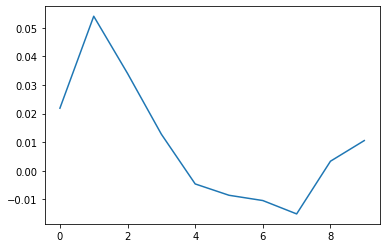

In [16]:
plt.plot(vibrations_array[:10])

In [ ]:
size = 500000

smoothed = getSmoothData(vibrations[:size])
separators = getSeparators(smoothed)
separators = deduplication(separators)
splited = split(vibrations[1], separators)

In [ ]:
print(type(smoothed))

In [ ]:
# 속도를 위해 사이즈 지정하여 일부만 출력
size = 500000

smoothed = getSmoothData(vibrations[:size])
separators = getSeparators(smoothed)
separators = deduplication(separators)
splited = split(vibrations[1], separators)

# 데이터와 구분자 출력
plt.plot(smoothed)
for data in separators:
    plt.axvline(x=data, ymin=0, ymax=1, color = 'red')
plt.show()

# 분할된 데이터 출력
idx = 0
for data in splited:
    print(str(idx) + "번 사이클")
    idx += 1
    plt.plot(data)
    plt.show()